# Loan Prediction
## Based on Lending Club Data

A capstone project for Springboard Data Science Career Track Program.

The project goal is to train a classification model to predict bad loans on a major lending platform, Lending Club. The typical lending process:
* Applicants submit their loan applications to Lending Club
* Individual lenders can directly browse and select loan applications that they want to fund.

Eventually, borrowers pay interests and principals back to lenders.
 
With this business model, Lending Club is considered P2P lending. There’s still the risk of investors to run the risk of investing in a bad loan. 
This issue is to  be addressed in this project by developing a predictive model to identify bad loans by using information available on loan applications. Then, investors can make more objective and data-driven assessment of loan applications to minimize risk.


We can download dataset from Lending Club website: https://www.lendingclub.com/info/statistics.action.

However, it requires signing up as member to download the dataset. Thus, in this project, we will use dataset available from Kaggle. The dataset was downloaded from : https://www.kaggle.com/wordsforthewise/lending-club?select=rejected_2007_to_2018Q4.csv.gz

Unfortunately, this was updated a year ago, so, it's not the most recent data.

## Preparation

### Import Modules

In [1]:
# Essentials
import numpy as np
import pandas as pd
import datetime
import random

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# "magic" command to make plots show up in the notebook
%matplotlib inline 

from sklearn.preprocessing import LabelEncoder

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

### Import Data

In [2]:
# assign filepath into specific variables
rejected_filepath = 'data/rejected_2007_to_2018q4.csv/rejected_2007_to_2018Q4.csv'
accepted_filepath = 'data/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv'

In [3]:
rejected_df = pd.read_csv(rejected_filepath)

accepted_df = pd.read_csv(accepted_filepath)

# shape
print("The shape of the rejected_df:", rejected_df.shape)
print("The shape of the accepted_df: ", accepted_df.shape)

The shape of the rejected_df: (27648741, 9)
The shape of the accepted_df:  (2260701, 151)


## Exploratory Data Analysis

### Print Data

In [4]:
rejected_df.head(10)

Amount Requested Application Date                        Loan Title  \
0            1000.0       2007-05-26  Wedding Covered but No Honeymoon   
1            1000.0       2007-05-26                Consolidating Debt   
2           11000.0       2007-05-27       Want to consolidate my debt   
3            6000.0       2007-05-27                           waksman   
4            1500.0       2007-05-27                            mdrigo   
5           15000.0       2007-05-27                        Trinfiniti   
6           10000.0       2007-05-27                       NOTIFYi Inc   
7            3900.0       2007-05-27                       For Justin.   
8            3000.0       2007-05-28                            title?   
9            2500.0       2007-05-28                          timgerst   

   Risk_Score Debt-To-Income Ratio Zip Code State Employment Length  \
0       693.0                  10%    481xx    NM           4 years   
1       703.0                  10%    010xx    MA          < 1 year   
2       715.0                  10%    212xx    MD            1 year   
3       698.0               38.64%    017xx    MA          < 1 year   
4       509.0                9.43%    209xx    MD          < 1 year   
5       645.0                   0%    105xx    NY           3 years   
6       693.0                  10%    210xx    MD          < 1 year   
7       700.0                  10%    469xx    IN           2 years   
8       694.0                  10%    808xx    CO           4 years   
9       573.0               11.76%    407xx    KY           4 years   

   Policy Code  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  
5          0.0  
6          0.0  
7          0.0  
8          0.0  
9          0.0

In [5]:
accepted_df.head(10).T

9   
num_bc_sats                                                                                 7   
num_bc_tl                                                                                  10   
num_il_tl                                                                                   3   
num_op_rev_tl                                                                              13   
num_rev_accts                                                                              19   
num_rev_tl_bal_gt_0                                                                         9   
num_sats                                                                                   14   
num_tl_120dpd_2m                                                                            0   
num_tl_30dpd                                                                                0   
num_tl_90g_dpd_24m                                                                          0   
num_tl_op_past_12m                                                                          2   
pct_tl_nvr_dlq                                                                           95.7   
percent_bc_gt_75                                                                         28.6   
pub_rec_bankruptcies                                                                        1   
tax_liens                                                                                   0   
tot_hi_cred_lim                                                                         61099   
total_bal_ex_mort                                                                       27957   
total_bc_limit                                                                          16400   
total_il_high_credit_limit                                                              30799   
revol_bal_joint                                                                           NaN   
sec_app_fico_range_low                                                                    NaN   
sec_app_fico_range_high                                                                   NaN   
sec_app_earliest_cr_line                                                                  NaN   
sec_app_inq_last_6mths                                                                    NaN   
sec_app_mort_acc                                                                          NaN   
sec_app_open_acc                                                                          NaN   
sec_app_revol_util                                                                        NaN   
sec_app_open_act_il                                                                       NaN   
sec_app_num_rev_accts                                                                     NaN   
sec_app_chargeoff_within_12_mths                                                          NaN   
sec_app_collections_12_mths_ex_med                                                        NaN   
sec_app_mths_since_last_major_derog                                                       NaN   
hardship_flag                                                                               N   
hardship_type                                                                             NaN   
hardship_reason                                                                           NaN   
hardship_status                                                                           NaN   
deferral_term                                                                             NaN   
hardship_amount                                                                           NaN   
hardship_start_date                                                                       NaN   
hardship_end_date                                                                         NaN   
payment_plan_start_date                                                                   NaN   
hardship_length   

For this project, we would like to focus on the accepted loan. We are going to predict if the loan will be high risk or low risk.

In [6]:
# Encoding the `loan_status`
# status 1: 'Charged Off', 'Late (16-30 days)', 'Late (31-120 days)', 'Default'
# status 0: 'Fully Paid'
accepted_df['target'] = 1
accepted_df.loc[accepted_df['loan_status'] == 'Fully Paid', 'target'] = 0

In [7]:
data_null = accepted_df.isnull().sum() / len(accepted_df)
data_null = data_null.reset_index()
data_null = data_null.rename(columns={'index': 'feature', 0: 'missing'})

In [8]:

data_null = data_null.fillna(value=0)

feature_list = data_null['feature']

null_rate = []
not_null_rate = []
category = []
data_unique = []

for feature in feature_list:
    null_rate.append(accepted_df[accepted_df[feature].isnull()]['target'].mean())
    not_null_rate.append(accepted_df[~accepted_df[feature].isnull()]['target'].mean())
    category.append(accepted_df[feature].dtypes)
    data_unique.append(len(accepted_df[feature].unique()))

data_null['dtype'] = category    
data_null['null mean'] = null_rate
data_null['not null mean'] = not_null_rate
data_null['unique'] = data_unique

data_null = data_null.reset_index(drop=True)

data_null[['feature', 'missing', 'dtype', 'null mean', 
           'not null mean', 'unique']]

feature   missing    dtype  null mean  \
0                                            id  0.000000   object        NaN   
1                                     member_id  1.000000  float64   0.523709   
2                                     loan_amnt  0.000015  float64   1.000000   
3                                   funded_amnt  0.000015  float64   1.000000   
4                               funded_amnt_inv  0.000015  float64   1.000000   
5                                          term  0.000015   object   1.000000   
6                                      int_rate  0.000015  float64   1.000000   
7                                   installment  0.000015  float64   1.000000   
8                                         grade  0.000015   object   1.000000   
9                                     sub_grade  0.000015   object   1.000000   
10                                    emp_title  0.073872   object   0.620819   
11                                   emp_length  0.064998   object   0.609494   
12                               home_ownership  0.000015   object   1.000000   
13                                   annual_inc  0.000016  float64   1.000000   
14                          verification_status  0.000015   object   1.000000   
15                                      issue_d  0.000015   object   1.000000   
16                                  loan_status  0.000015   object   1.000000   
17                                   pymnt_plan  0.000015   object   1.000000   
18                                          url  0.000015   object   1.000000   
19                                         desc  0.944235   object   0.544580   
20                                      purpose  0.000015   object   1.000000   
21                                        title  0.010332   object   0.493707   
22                                     zip_code  0.000015   object   0.970588   
23                                   addr_state  0.000015   object   1.000000   
24                                          dti  0.000771  float64   0.826261   
25                                  delinq_2yrs  0.000027  float64   1.000000   
26                             earliest_cr_line  0.000027   object   1.000000   
27                               fico_range_low  0.000015  float64   1.000000   
28                              fico_range_high  0.000015  float64   1.000000   
29                               inq_last_6mths  0.000028  float64   0.984127   
30                       mths_since_last_delinq  0.512467  float64   0.526988   
31                       mths_since_last_record  0.841131  float64   0.526616   
32                                     open_acc  0.000027  float64   1.000000   
33                                      pub_rec  0.000027  float64   1.000000   
34                                    revol_bal  0.000015  float64   1.000000   
35                                   revol_util  0.000812  float64   0.631063   
36                                    total_acc  0.000027  float64   1.000000   
37                          initial_list_status  0.000015   object   1.000000   
38                                    out_prncp  0.000015  float64   1.000000   
39                                out_prncp_inv  0.000015  float64   1.000000   
40                                  total_pymnt  0.000015  float64   1.000000   
41                              total_pymnt_inv  0.000015  float64   1.000000   
42                              total_rec_prncp  0.000015  float64   1.000000   
43                                total_rec_int  0.000015  float64   1.000000   
44                           total_rec_late_fee  0.000015  float64   1.000000   
45                                   recoveries  0.000015  float64   1.000000   
46                      collection_recovery_fee  0.000015  float64   1.000000   
47                                 last_pymnt_d  0.001088   object   1.000000   
48                              last_pymnt_amnt  0.000015  float64   1.

### Initial Thougths

Since The Lending Club was launched in 2012, there may have been significant changes in its loan portfolios since then. The code transforms the issue date of the loans so that we have use them in further analysis.

Lending Club was launched back in 2012. Since then, the platform has gotten more exposure and popularity. Thus, we expected significant increase in its loan portfolios over the years.

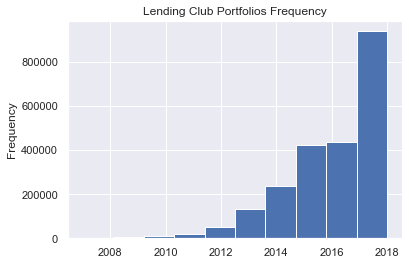

In [9]:
accepted_df.term = accepted_df.term.apply(str)
accepted_df['term'] = accepted_df['term'].apply(lambda x: x.strip().split(" ")[0])

accepted_df.issue_d = pd.to_datetime(accepted_df.issue_d)
accepted_df['issue_yr'] = accepted_df.issue_d.dt.year

sns.set()
accepted_df['issue_yr'].plot.hist()
plt.title('Lending Club Portfolios Frequency')
plt.show()

### Data transformation


I decide to drop several columns because they are a linear combination of others, or they contain too little information. 

As for Zip Code, we only have the first 3 number so this feature is not helpful.

In [10]:
accepted_df = accepted_df.drop(['title', 'funded_amnt'], axis = 1)
accepted_df = accepted_df.drop(['out_prncp_inv','total_rec_prncp','total_pymnt_inv'], axis = 1)
accepted_df = accepted_df.drop(['fico_range_low', 'last_fico_range_low',
                         'avg_cur_bal',
                         'addr_state', 'initial_list_status', 'pymnt_plan',
                         'application_type', 'hardship_flag', 'disbursement_method',
                          'debt_settlement_flag','sub_grade',
                         'zip_code', 'id','policy_code','tax_liens', 'tax_liens'], axis = 1)

Furthermore, I transform several variables into the date type for easier analysis later.

In [11]:
accepted_df.home_ownership = accepted_df.home_ownership.replace(['ANY', 'NONE','OTHER'], 'RENT')

# transform to pandas DateTime object
accepted_df['issue_yr'] = accepted_df.issue_d.dt.year
accepted_df['earliest_cr_line'] = pd.to_datetime(accepted_df.earliest_cr_line)
accepted_df['early_cr_yr'] = accepted_df.earliest_cr_line.dt.year

median_year = accepted_df.emp_length.value_counts(ascending = False).index[0]
accepted_df.loc[:, 'emp_length'] = accepted_df.loc[:, 'emp_length'].fillna(median_year)

accepted_df.emp_length = accepted_df.emp_length.replace(['10+ years'], '10 years')
accepted_df.emp_length = accepted_df.emp_length.replace(['< 1 year'], '0 years')

accepted_df.emp_length = accepted_df.emp_length.apply(lambda x: int(str(x).split(' ')[0]))
print(accepted_df.emp_length.value_counts())

accepted_df.loc[:, 'emp_title'] = accepted_df.loc[:, 'emp_title'].fillna('other')
accepted_df.emp_title = accepted_df.emp_title.apply(lambda x: x.lower())
accepted_df.emp_title = accepted_df.emp_title.replace(['lpn','registered nurse', 'rn'], 'nurse')

10    894945
2     203677
0     189988
3     180753
1     148403
5     139698
4     136605
6     102628
7      92695
8      91914
9      79395
Name: emp_length, dtype: int64


### Change of rates through time


Each loan receives a grade that ranges from G through A. Starting November 2017, grade F and G are no longer used. These codes will plot the average interest rate according to grate through time.

In [12]:
rate = pd.pivot_table(accepted_df[accepted_df['term'] == '36'],index=["grade","issue_yr"],values=["int_rate"], aggfunc=np.mean)
rate.shape # 77, 1
rate = rate.reset_index()

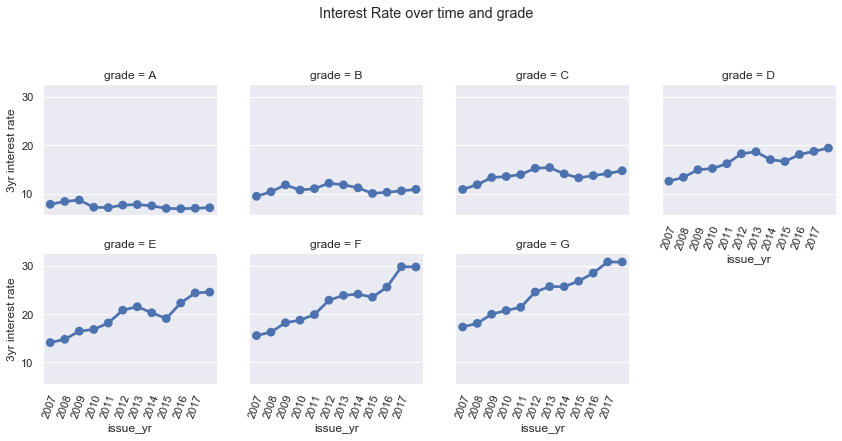

In [13]:
g = sns.FacetGrid(rate, col = 'grade', col_wrap = 4)
g = g.map(sns.pointplot, "issue_yr", "int_rate")

labels = np.arange(2007, 2018, 1)
labels = [str(i) for i in labels]
g = g.set_xticklabels(labels, rotation=70)
g = g.set_ylabels("3yr interest rate")

plt.subplots_adjust(top=0.8)
g.fig.suptitle('Interest Rate over time and grade')
plt.show()

We can see that interest rate for grade D, E, F, G increase quickly from 2014.

We have very few data points from 2007 to 2014. Let's take a closer look to see if this increase in average rate is not due to the small number of observations.



In [14]:
# Number of observations for each grade
# to verify the variance of rates
rate_count = pd.pivot_table(accepted_df[accepted_df['term'] == '36'],index=["grade","issue_yr"],values=["int_rate"], aggfunc='count')
rate_count = rate_count.unstack('grade')
rate_count

int_rate                                       
grade           A       B      C      D     E     F    G
issue_yr                                                
2007.0         78      98    141     99   100    52   35
2008.0        318     594    580    419   285   111   86
2009.0       1203    1445   1348    817   308   105   55
2010.0       2567    2805   2070   1253   336    91   34
2011.0       5579    4722   2203   1261   272    54   10
2012.0      10753   16805   9902   5088   795   103   24
2013.0      17057   40313  24693  14505  3231   608   15
2014.0      35333   53460  44042  20510  7066  1980  179
2015.0      70132   91783  77457  32740  9450  1363  248
2016.0      66862  114783  92317  36707  9932  2364  530
2017.0      76300  108943  88425  34572  9837  1574  768
2018.0     122999   99155  76680  36228  9179   312  118

### Borrowing Purpose

In [15]:
purpose = accepted_df.purpose.value_counts().sort_values(ascending=False)
print(purpose)

debt_consolidation    1277877
credit_card            516971
home_improvement       150457
other                  139440
major_purchase          50445
medical                 27488
small_business          24689
car                     24013
vacation                15525
moving                  15403
house                   14136
wedding                  2355
renewable_energy         1445
educational               424
Name: purpose, dtype: int64


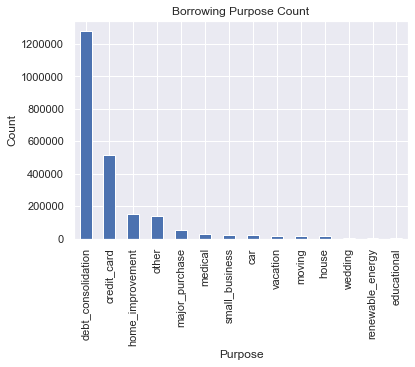

In [16]:
sns.set()
purpose.plot.bar()
plt.title('Borrowing Purpose Count')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.show()

### Distribution of Income across Grade


Let's take a leap of faith and only examine the loans where income has been verified. The variable verification status can take one of 3 values: Verified, Source Verified or Not Verified. Here I only filtered for loans whose verification status is different from 'Not Verified'.

I put a cap on the high income (95% percentile), because the high income level can be in the amount of $500,000, which is not that regular and will distort the chart.

In [17]:
incomeVerified = accepted_df[accepted_df['verification_status'] != 'Not Verified']
incomeVerified = incomeVerified[['grade','annual_inc']]
quantile_low = incomeVerified['annual_inc'].min()
quantile_high = incomeVerified['annual_inc'].quantile(0.95)
filtered = incomeVerified[(incomeVerified['annual_inc'] > quantile_low) & (incomeVerified['annual_inc'] <= quantile_high)]

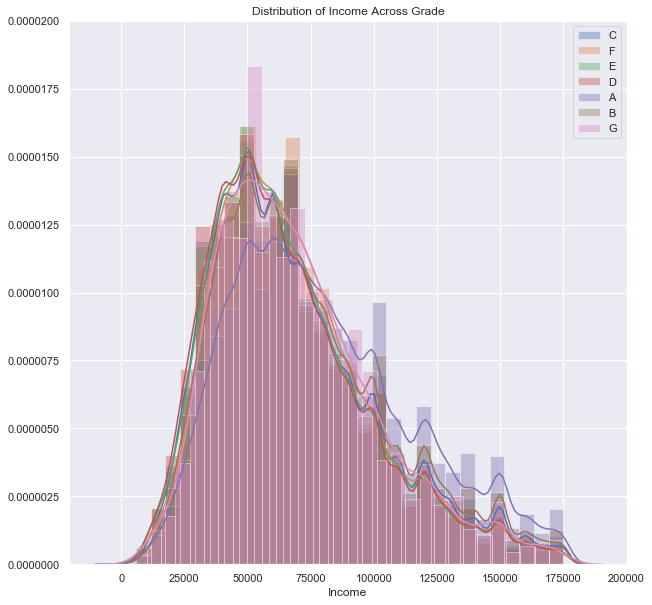

In [18]:
grade_list = filtered['grade'].unique()
sns.set()
plt.figure(figsize=(10,10))
for i in range(len(grade_list)):
    data = filtered[filtered['grade'] == grade_list[i]]['annual_inc'].values
    sns.distplot(data, bins = 30)

plt.legend(grade_list)
plt.title("Distribution of Income Across Grade")
plt.xlabel('Income')
plt.ylim(ymax = 0.00002)
plt.show()

There seems to be a slight difference in income level across grade, with one grade has a high density of income above $100,000. Perhaps it may not be beneficial to dive too deep into it, except having a brief look at the median income accross each grade. We do see that while other grades seem to have similar median incomes, grade A does stand out.



In [19]:
# Median of incomes in each grade
income_median = pd.pivot_table(filtered, values = 'annual_inc', index = 'grade', aggfunc = np.median)
income_median

annual_inc
grade            
A         74000.0
B         65000.0
C         62000.0
D         60000.0
E         60000.0
F         62891.0
G         65000.0

### Income Distribution by Professions


Because of the large number of observations that we have, we can construct a reliable distribution of annual incomes.But first, further transformation:

* Filtering for loans where the reported income is less than 1 million USD
* Filtering for loans where Debt-to-Income ratio is less than 100 percent. If it is greater than or equal to 100, I wonder why we would have made such loans in the first place. I could have been more careful by capping dti value at 100.

Changing employment years into numeric
* Filling unknown values for home-ownership as Rent
* Standardizing the values of employment title (emp_title)

Because people will most likely lie on their incomes when their income is low, we can filter out for data if:

* Income is lower than \$70,000 but has been verified by Lending Club

* Income is higher than \$70,000 but lower than \$120,000

* Income is higher than \$120,000 but has been verified by Lending Club

The choice of limit of \$70,000 and \$120,000 is arbitrary to filter out loans where income levels seem unrealistic.

In [20]:
pd.options.display.float_format = '{:,.0f}'.format
salary_limit = 7e4

emp_annual_all = accepted_df.loc[((accepted_df['annual_inc'] >= 1.2e5) & (accepted_df['verification_status'] == 'Verified')) 
                              | ((accepted_df['annual_inc'] >= salary_limit) & (accepted_df['annual_inc'] < 1.2e5)) 
                              | ((accepted_df['annual_inc'] < salary_limit) & (accepted_df['verification_status'] == 'Verified')),
                              ['emp_title','annual_inc']].groupby('emp_title')


summ_inc = emp_annual_all.agg(['min','mean','median','max', 'count'])
summ_inc.columns = summ_inc.columns.levels[1]
summ_inc = summ_inc.sort_values(by = ['count','min'], ascending = False)

# Filter for professions with more than 500 observations
summ_inc = summ_inc[summ_inc['count'] >= 500].sort_values(by = ['count','min'], ascending = False)
summ_inc

min    mean  median         max  count
emp_title                                                             
other                             0  55,211  50,000   3,330,432  98333
nurse                        10,000  84,118  81,000     320,000  29515
teacher                           0  74,662  75,000     367,500  22437
manager                       2,500  84,846  82,000   4,800,000  22218
owner                             0  93,432  85,000   1,000,000  13998
driver                            0  74,401  75,000   1,000,000  10264
supervisor                      500  76,947  75,340     780,000   9738
sales                             0  87,748  80,000   2,000,000   8722
project manager                   0  92,144  90,000     460,000   8616
general manager              20,000  93,502  84,500     700,000   6739
engineer                      2,439 113,053  91,000 110,000,000   5973
truck driver                 14,000  73,688  75,000     790,000   5680
office manager                    0  66,101  70,000     300,000   5288
director                          0 123,013 102,000   1,000,000   5090
president                     7,956 129,495 100,000   3,000,000   4730
operations manager           15,300  86,669  84,000     450,000   4595
police officer               20,000  89,610  89,550     307,000   4502
sales manager                 1,000 100,579  92,000   1,000,000   4358
vice president               15,000 143,339 110,000   1,750,000   3395
attorney                     12,000 117,636 100,000   1,200,000   3276
store manager                11,263  77,854  77,000     250,000   3274
accountant                    6,000  76,697  75,000     467,000   3242
account manager              22,880  83,619  80,000     400,000   3016
software engineer            38,400  98,113  95,000   1,000,000   2928
mechanic                     12,000  75,933  75,000     250,000   2889
technician                   11,400  72,467  75,000     221,000   2832
analyst                      19,200  86,850  83,200     750,000   2795
executive assistant          15,000  78,783  78,000     270,000   2599
foreman                           0  81,677  80,000     245,000   2492
controller                    9,600  96,784  92,500     650,000   2491
branch manager               18,000  91,043  80,231     700,000   2486
electrician                  16,583  81,398  80,000     258,000   2379
consultant                   14,400 100,397  92,000     560,000   2191
program manager              25,000  99,243  96,000     750,000   2121
administrator                 7,255  91,887  90,000   1,181,708   2052
operator                          0  78,608  80,000     200,000   2047
principal                    23,000 105,966  95,775   1,100,000   1980
administrative assistant      8,000  56,417  50,000     210,000   1963
supervisor                    3,200  75,330  75,000     450,000   1936
business analyst             33,000  85,068  82,026     240,000   1932
paralegal                    20,000  73,323  75,000     228,000   1872
ceo                          10,000 145,216 100,000   1,500,000   1813
it manager                   10,000  99,485  97,000     571,429   1801
professor                    15,000  99,122  91,000     535,000   1733
account executive            24,000  97,305  88,000     800,000   1663
superintendent               17,000  94,008  90,000     450,000   1651
director of operations        6,000  99,069  93,200     535,000   1639
district manager             25,000  95,225  90,000     350,000   1634
assistant manager             3,500  57,345  54,000     160,000   1621
executive director           25,000 116,320  95,000     750,000   1614
service manager              24,450  81,322  80,000     338,188   1498
manager                      12,000  80,488  80,000     500,000   1449
officer                      24,000  91,894  92,000     263,000   1418
correctional officer         24,000  77,366  79,000     160,000   1377
clerk                        10,000  59,618  60,000     

This dataset does have a large diversity in the professions and income level of borrowers. Personally, what I find most interesting is that:

* Teacher and Nurse, despite being regarded as respectable professions in some regions in the world, are the 2 most common professions on Lending Club. Their minimum salary is only around \$12,000, which is lower than US' Poverty Level for individual.

* Police officer has a minimum salary of \$32,000

* Many people with annual income higher than \$400,000 and even \$1,000,000 still use Lending Club as a way to borrow cheaply. I can dive down into the purpose of the loans later, but that may not offer much benefit for data modeling.

* Some jobs traditionally associated with high income have very min income, such as attorney, director, enginee. And these salaries have been verified by Lending Club. It's likely that these salaries miss a 0's. This is worthy of attention.

### Fico range and grade

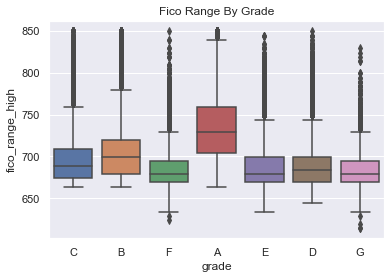

In [21]:
sns.boxplot(data=accepted_df, x='grade', y='fico_range_high')
plt.title('Fico Range By Grade')
plt.show()

### Charge off rate vs Verification status

My hypothesis is that Lending Club tends to take the effort to verify a borrower's income only when it is high. To quickly examine this hypothesis, I look at the charge off rate across each grade depending on whether the income is Verified or not.

I define that a loan is considered charge-off when the value of loan_status is Charged Off or Default. I can expand it to 90 days behind dues, but it does not make that large of a difference.

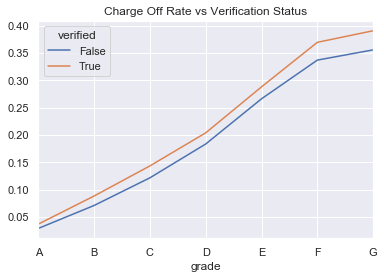

In [22]:
accepted_df['verified'] = accepted_df['verification_status'] == 'Verified'
grade_yr_loanamnt = pd.pivot_table(accepted_df,index=["grade","verified"], values=['loan_amnt'], aggfunc=np.sum)

grade_yr_loanamnt_default = pd.pivot_table(accepted_df[(accepted_df.loan_status == 'Charged Off') | (accepted_df.loan_status == 'Default')],
                                           index=["grade","verified"], values=['loan_amnt'], aggfunc=np.sum)

grade_yr_loanamnt_default.columns = ['Charged_off']

loan_verified = pd.merge(grade_yr_loanamnt, grade_yr_loanamnt_default, left_index = True, right_index = True)
loan_verified['chargeoff_rate']  = loan_verified['Charged_off'] /  loan_verified['loan_amnt'] 

loan_verified_unstack = loan_verified.unstack("verified")
verified_chargedoff = loan_verified_unstack['chargeoff_rate']
verified_chargedoff.plot()
plt.title('Charge Off Rate vs Verification Status')
plt.show()

## Missing Values

### Categorical Variable

In [23]:
# for `emp_length`, since the order matters, we will fill the missing value with mode
emp_length_mode = accepted_df['emp_length'].mode()[0]
accepted_df['emp_length'] = accepted_df['emp_length'].fillna(value=emp_length_mode)

### Numerical Variable

In [24]:
# fill the missing value with the median to make it more robust
dti_median = accepted_df['dti'].median()
accepted_df['dti'] = accepted_df['dti'].fillna(value=dti_median)

In [25]:
# for `inq_last_6mths`, fill the missing value with the mode
inq_last_6mths_mode = accepted_df['inq_last_6mths'].mode()[0]
accepted_df['inq_last_6mths'] = accepted_df['inq_last_6mths'].fillna(value=inq_last_6mths_mode)

In [26]:
# for `revol_util`, fill the missing value with the median to make it more robust
revol_util_median = accepted_df['revol_util'].median()
accepted_df['revol_util'] = accepted_df['revol_util'].fillna(value=revol_util_median)

In [27]:
# for `bc_open_to_buy`, fill the missing value with the median to make it more robust
bc_open_to_buy_median = accepted_df['bc_open_to_buy'].median()
accepted_df['bc_open_to_buy'] = accepted_df['bc_open_to_buy'].fillna(value=bc_open_to_buy_median)

In [28]:
# for `bc_util`, fill the missing value with the median to make it more robust
bc_util_median = accepted_df['bc_util'].median()
accepted_df['bc_util'] = accepted_df['bc_util'].fillna(value=bc_util_median)

In [29]:
# for `mo_sin_old_il_acct`, fill the missing value with the median to make it more robust
mo_sin_old_il_acct_median = accepted_df['mo_sin_old_il_acct'].median()
accepted_df['mo_sin_old_il_acct'] = accepted_df['mo_sin_old_il_acct'].fillna(value=mo_sin_old_il_acct_median)

In [30]:
# for `mths_since_recent_bc`, fill the missing value with the median to make it more robust
mths_since_recent_bc_median = accepted_df['mths_since_recent_bc'].median()
accepted_df['mths_since_recent_bc'] = accepted_df['mths_since_recent_bc'].fillna(value=mths_since_recent_bc_median)

In [31]:
# for `mths_since_recent_inq`, fill the missing value with the median to make it more robust
mths_since_recent_inq_median = accepted_df['mths_since_recent_inq'].median()
accepted_df['mths_since_recent_inq'] = accepted_df['mths_since_recent_inq'].fillna(value=mths_since_recent_inq_median)

In [32]:
# for `num_rev_accts`, fill the missing value with 0
accepted_df['num_rev_accts'] = accepted_df['num_rev_accts'].fillna(value=0)

In [33]:
# for `num_tl_120dpd_2m`, fill the missing value with 0
accepted_df['num_tl_120dpd_2m'] = accepted_df['num_tl_120dpd_2m'].fillna(value=0)

In [34]:
# for `percent_bc_gt_75`, fill the missing value with the median to make it more robust
percent_bc_gt_75_median = accepted_df['percent_bc_gt_75'].median()
accepted_df['percent_bc_gt_75'] = accepted_df['percent_bc_gt_75'].fillna(value=percent_bc_gt_75_median)

### More Visualizing

In order to save some computational time, for visualization purposes, we will only use 100,000 observations.

In [36]:
data_plot= accepted_df.sample(n=100000, replace=False, random_state=21)

In [72]:
# define categorical and numerical features
cat_features = ['term', 'home_ownership', 'verification_status', 'purpose',
                'grade']

num_features = ['loan_amnt', 'int_rate', 'emp_length', 
                'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 
                'revol_bal', 'revol_util', 'total_acc', 'collections_12_mths_ex_med', 
                'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 
                'acc_open_past_24mths', 'bc_open_to_buy', 'bc_util', 
                'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 
                'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 
                'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
                'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
                'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
                'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
                'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 
                'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies',
                'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
                'total_il_high_credit_limit']

features = cat_features + num_features

# define numerical and categorical features
print('Categorical feature:\t', len(cat_features))
print('Numerical feature:\t', len(num_features))
print('Total feature:\t\t', len(features))

Categorical feature:	 5
Numerical feature:	 50
Total feature:		 55


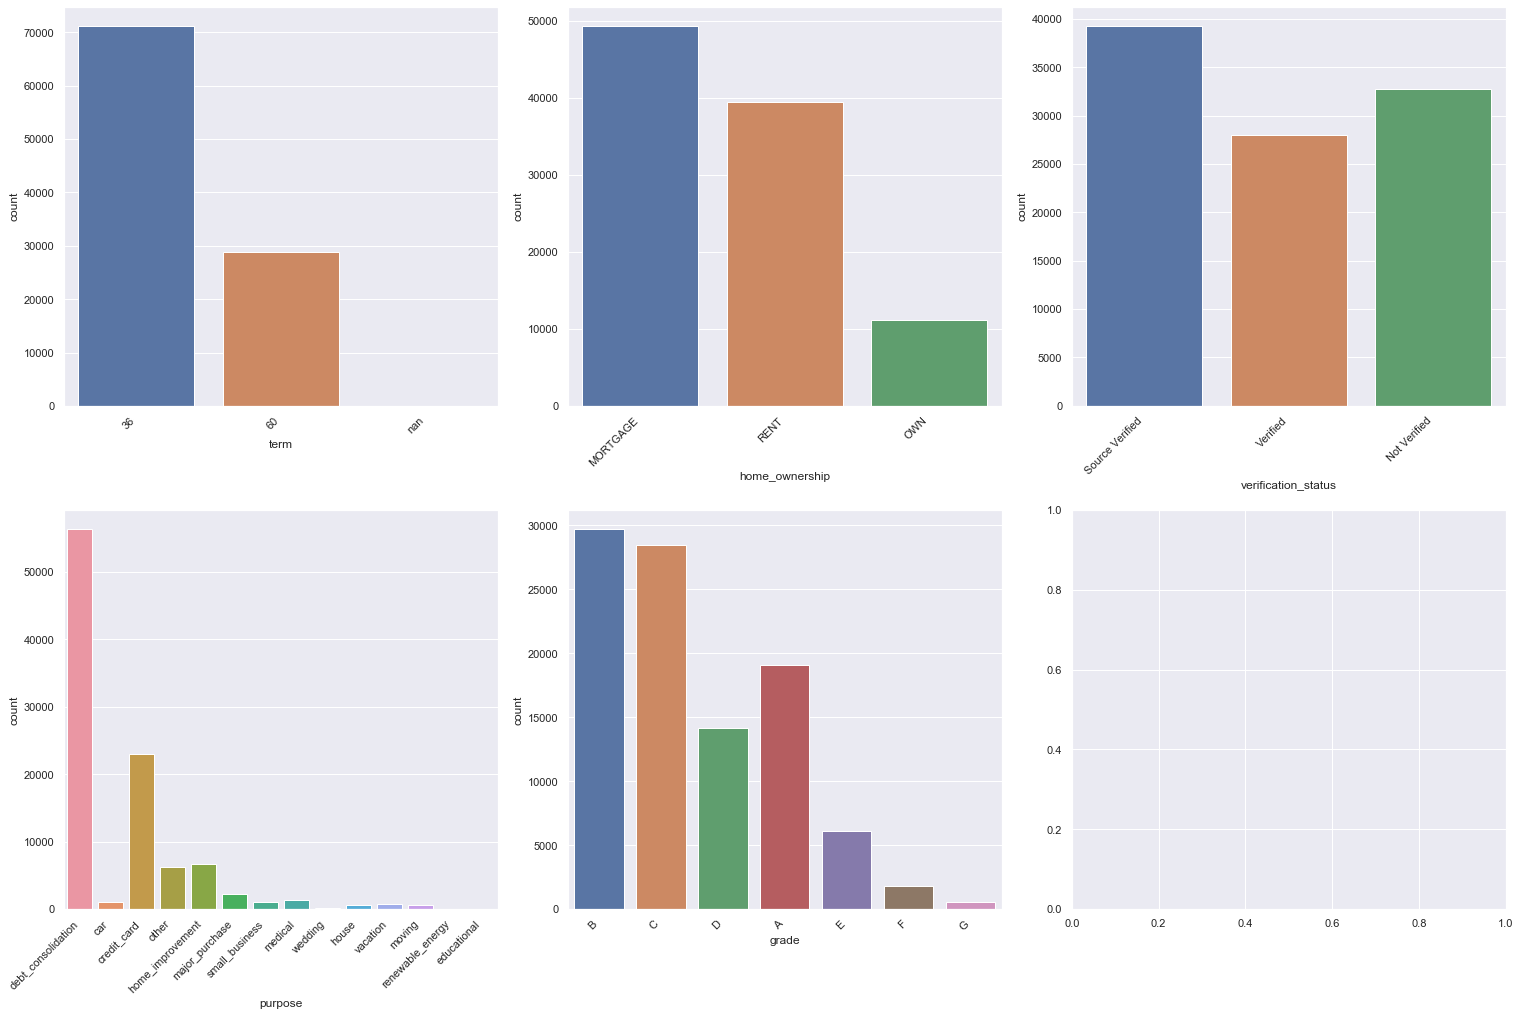

In [39]:
num_plots = len(cat_features)
total_cols = 3
total_rows = num_plots//total_cols + 1
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), constrained_layout=True)
for i, var in enumerate(cat_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=data_plot, ax=axs[row][pos], orient='h')
    plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

In [47]:
num_features_to_plot = ['loan_amnt', 'funded_amnt_inv', 'int_rate', 'installment',
       'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_high',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'total_pymnt', 'total_rec_int', 'total_rec_late_fee',
       'tot_cur_bal', 'total_rev_hi_lim']

In [76]:
num_plots = len(num_features_to_plot)
total_cols = 3
total_rows = num_plots//total_cols + 1
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), constrained_layout=True)
for i, var in enumerate(num_features_to_plot):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.distplot(data_plot[var].dropna(), ax=axs[row][pos])

plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'show'

### Correlation Heatmap

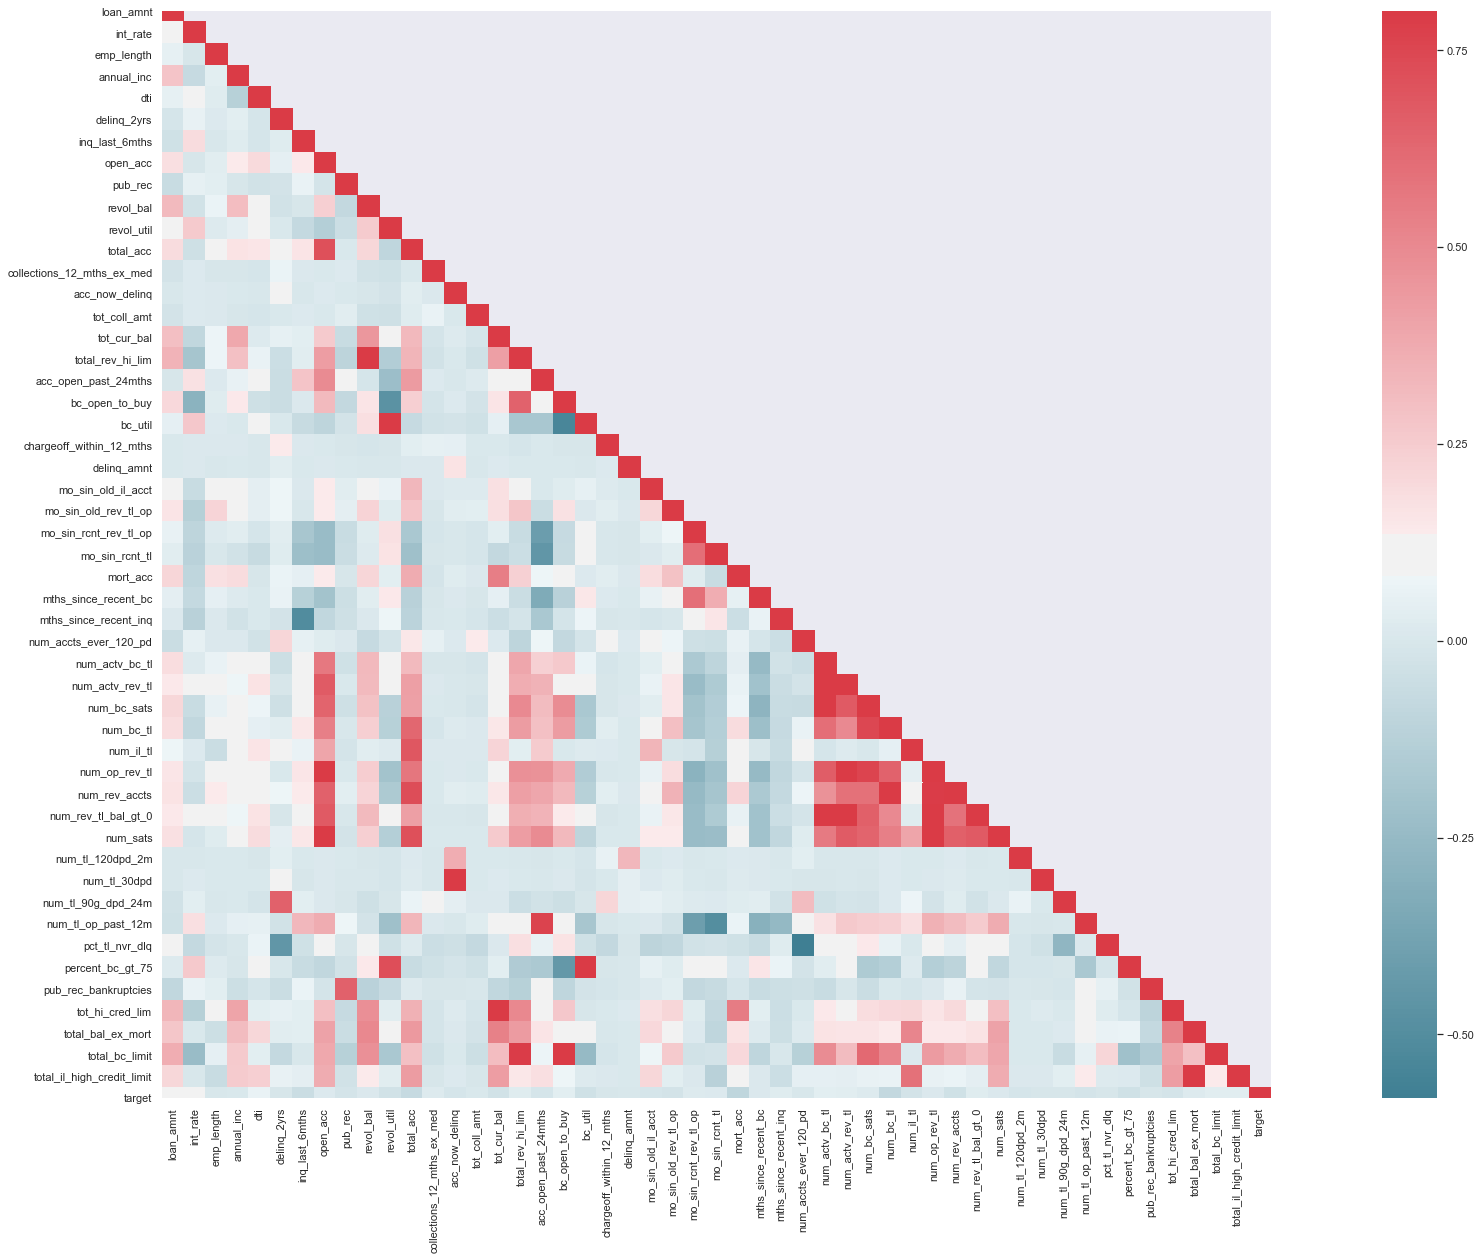

In [75]:
# calculate the pair-wise correlation
subset = num_features + ['target']
corrMatt = data_plot[subset].corr()      

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(40,20)
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True, cmap=cmap)
plt.show()